In [37]:
import pandas as pd
from itertools import combinations
import matplotlib.pyplot as plt
import re
import numpy as np

from collections import defaultdict 
np.random.seed(0)

In [38]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False

plt.rcParams["font.family"] = "Helvetica" #somethings this one doesnt work
plt.rcParams['pdf.fonttype'] = 42

In [39]:
file = "../data/fasta_files/AllSeqs_IntegralAround_WxxLF_-50_+20_top138.fasta"

def read_fasta(fasta_file):
    with open(fasta_file, "r") as f:
        lines = f.readlines()

    seqs = []
    names = []
    seq = ""

    for line in lines:
        if line.startswith('>'):
            names.append(line.strip().replace(">", ""))
            if len(seq) > 0:
                seqs.append(seq)
                seq = ""
        else:
            seq += line.strip()
    seqs.append(seq)


    seq_df = pd.DataFrame({"name" : names, "aa_seq" : seqs})
    return seq_df

In [40]:
def create_mutants(sequence, aa_to_mutate, mutate_to):
    # Identify indexes of amino acids in the string sequence
    positions = [i for i, aa in enumerate(sequence) if aa in aa_to_mutate]

    mutants_list = []
    # loops through 1 mutation to all mutations
    for i in range(1,len(positions)+1):
        mutants_list.append(set())
        # Combines i number of posible "mutation" positions, goes through all possible combinations
        for pos in combinations(positions, i): 
            mutant = list(sequence)
            # Create the mutant sequence
            for p in pos:
                mutant[p] = mutate_to 
            mutants_list[i-1].add("".join(mutant))
    
    return positions, mutants_list

In [41]:
seq_df = read_fasta(file)
seq_df

,name,aa_seq
0,Eurotiomycetes_jgi|Penatra1|34162|e_gw1.2.1160.1,MFTDLDVAGHEDWPSLFDHSSEPLNAFDLATL
1,Scas_Scas663.23,SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESLDESN...
2,Cten_EGV62856.1_CandidaTenuisATCC10573,ESAPGLSAPDSSLAFHSEVLDSVFSNDEAVDHTPMFDELDFMLESS...
3,Eurotiomycetes_jgi|Asptam1|203219|CE203218_32345,PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMFATDMELGP...
4,Eurotiomycetes_jgi|Penbr2|60600|gm1.7763_g,ISPRDLMMDTSVPPSGTFTDLSTPSFESPGNFSQNASPMFTDMDLV...
...,...,...
133,Sordariomycetes_jgi|Hypfra2|223471|CE223470_11...,QDHFTSAPNSSAITNLTSPSMYGESPDLHDSYEVSPNYGGSDFDHG...
134,Blastocladiomycota_jgi|Catan2|1506241|gm1.11555_g,TSTSAPPSPVPSLELCAATSGRALSKSPSPFDFGAAPPADATLVVS...
135,Saccharomycotina_jgi|Ascru1|80718|fgenesh1_pm....,NSNRRNNAISHDDVVAPKQTISREELLLITDQVFSNDNVSIFDEKL...
136,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,DDHNADQALRSNPGLTISPFEIHSSVIGSIFEDPDAETAPMFEPRE...


# Do tile wise analysis

In [42]:
seq_df["tiles"] = [np.array([seq[i:i+40] for i in range(len(seq)-39)], dtype=object) for seq in seq_df["aa_seq"]]
seq_df

,name,aa_seq,tiles
0,Eurotiomycetes_jgi|Penatra1|34162|e_gw1.2.1160.1,MFTDLDVAGHEDWPSLFDHSSEPLNAFDLATL,[]
1,Scas_Scas663.23,SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESLDESN...,"[SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFE, EEQ..."
2,Cten_EGV62856.1_CandidaTenuisATCC10573,ESAPGLSAPDSSLAFHSEVLDSVFSNDEAVDHTPMFDELDFMLESS...,"[ESAPGLSAPDSSLAFHSEVLDSVFSNDEAVDHTPMFDELD, SAP..."
3,Eurotiomycetes_jgi|Asptam1|203219|CE203218_32345,PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMFATDMELGP...,"[PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMFAT, KDL..."
4,Eurotiomycetes_jgi|Penbr2|60600|gm1.7763_g,ISPRDLMMDTSVPPSGTFTDLSTPSFESPGNFSQNASPMFTDMDLV...,"[ISPRDLMMDTSVPPSGTFTDLSTPSFESPGNFSQNASPMF, SPR..."
...,...,...,...
133,Sordariomycetes_jgi|Hypfra2|223471|CE223470_11...,QDHFTSAPNSSAITNLTSPSMYGESPDLHDSYEVSPNYGGSDFDHG...,"[QDHFTSAPNSSAITNLTSPSMYGESPDLHDSYEVSPNYGG, DHF..."
134,Blastocladiomycota_jgi|Catan2|1506241|gm1.11555_g,TSTSAPPSPVPSLELCAATSGRALSKSPSPFDFGAAPPADATLVVS...,"[TSTSAPPSPVPSLELCAATSGRALSKSPSPFDFGAAPPAD, STS..."
135,Saccharomycotina_jgi|Ascru1|80718|fgenesh1_pm....,NSNRRNNAISHDDVVAPKQTISREELLLITDQVFSNDNVSIFDEKL...,"[NSNRRNNAISHDDVVAPKQTISREELLLITDQVFSNDNVS, SNR..."
136,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,DDHNADQALRSNPGLTISPFEIHSSVIGSIFEDPDAETAPMFEPRE...,"[DDHNADQALRSNPGLTISPFEIHSSVIGSIFEDPDAETAP, DHN..."


In [43]:
seq_names = []
seq_tiles = []

for tiles, name in zip(seq_df["tiles"].values, seq_df["name"].values):
    seq_names += [name]* len(tiles)
    seq_tiles += list(tiles)

mutant_dict = {
    1: [], 
    2: [], 
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: []
    }

# Need to keep track of which mutant is from which original sequence
name_dict = {
    1: [], 
    2: [], 
    3: [],
    4: [],
    5: [],
    6: [],
    7: [],
    8: []
    }

for seq, name in zip(seq_tiles, seq_names): 
    mutants = create_mutants(seq, 'F', 'A')[1]
    i = 1
    for mutant_set in mutants:
        for mutant in mutant_set:
            mutant_dict[i].append(mutant)
            name_dict[i].append(name)
        i += 1


In [44]:
def write_to_fasta(seq_list, name_list, filename):
    with open(filename, "w+") as f:
        for name, seq in zip(name_list, seq_list):
            f.write(f">{name}\n")
            f.write(f"{seq}\n")

In [45]:
# write_to_fasta(seq_tiles, seq_names, "zero_mutant_tiles.fasta")
# write_to_fasta(mutant_dict[1], name_dict[1], "one_mutant_tiles.fasta")
# write_to_fasta(mutant_dict[2], name_dict[2], "two_mutant_tiles.fasta")
# write_to_fasta(mutant_dict[3], name_dict[3], "three_mutant_tiles.fasta")
# write_to_fasta(mutant_dict[4], name_dict[4], "four_mutant_tiles.fasta")
# write_to_fasta(mutant_dict[5], name_dict[5], "five_mutant_tiles.fasta")
# write_to_fasta(mutant_dict[6], name_dict[6], "six_mutant_tiles.fasta")
# write_to_fasta(mutant_dict[7], name_dict[7], "seven_mutant_tiles.fasta")
# write_to_fasta(mutant_dict[8], name_dict[8], "eight_mutant_tiles.fasta")

##### Run TADA on sequences

In [46]:
tile_predictions_0 = pd.read_csv("TADA_preds/zero_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_0["tada_preds"] = [v for ls in tile_predictions_0["tada_preds"] for v in ls]

tile_predictions_1 = pd.read_csv("TADA_preds/one_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_1["tada_preds"] = [v for ls in tile_predictions_1["tada_preds"] for v in ls]

tile_predictions_2 = pd.read_csv("TADA_preds/two_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_2["tada_preds"] = [v for ls in tile_predictions_2["tada_preds"] for v in ls]

tile_predictions_3 = pd.read_csv("TADA_preds/three_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_3["tada_preds"] = [v for ls in tile_predictions_3["tada_preds"] for v in ls]

tile_predictions_4 = pd.read_csv("TADA_preds/four_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_4["tada_preds"] = [v for ls in tile_predictions_4["tada_preds"] for v in ls]

tile_predictions_5 = pd.read_csv("TADA_preds/five_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_5["tada_preds"] = [v for ls in tile_predictions_5["tada_preds"] for v in ls]

tile_predictions_6 = pd.read_csv("TADA_preds/six_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_6["tada_preds"] = [v for ls in tile_predictions_6["tada_preds"] for v in ls]

tile_predictions_7 = pd.read_csv("TADA_preds/seven_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_7["tada_preds"] = [v for ls in tile_predictions_7["tada_preds"] for v in ls]

tile_predictions_8 = pd.read_csv("TADA_preds/eight_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_8["tada_preds"] = [v for ls in tile_predictions_8["tada_preds"] for v in ls]

tile_predictions_more_than_4 = list(tile_predictions_8["tada_preds"]) + list(tile_predictions_7["tada_preds"]) + list(tile_predictions_6["tada_preds"]) + list(tile_predictions_5["tada_preds"]) + list(tile_predictions_4["tada_preds"])

In [47]:
tile_predictions_0_old = pd.read_csv("TADA_preds_old/zero_mutant_tiles/zero_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_0_old["tada_preds"] = [v for ls in tile_predictions_0_old["tada_preds"] for v in ls]

tile_predictions_1_old = pd.read_csv("TADA_preds_old/one_mutant_tiles/one_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_1_old["tada_preds"] = [v for ls in tile_predictions_1_old["tada_preds"] for v in ls]

tile_predictions_2_old = pd.read_csv("TADA_preds_old/two_mutant_tiles/two_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_2_old["tada_preds"] = [v for ls in tile_predictions_2_old["tada_preds"] for v in ls]

tile_predictions_3_old = pd.read_csv("TADA_preds_old/three_mutant_tiles/three_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_3_old["tada_preds"] = [v for ls in tile_predictions_3_old["tada_preds"] for v in ls]

tile_predictions_4_old = pd.read_csv("TADA_preds_old/four_mutant_tiles/four_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_4_old["tada_preds"] = [v for ls in tile_predictions_4_old["tada_preds"] for v in ls]

tile_predictions_5_old = pd.read_csv("TADA_preds_old/five_mutant_tiles/five_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_5_old["tada_preds"] = [v for ls in tile_predictions_5_old["tada_preds"] for v in ls]

tile_predictions_6_old = pd.read_csv("TADA_preds_old/six_mutant_tiles/six_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_6_old["tada_preds"] = [v for ls in tile_predictions_6_old["tada_preds"] for v in ls]

tile_predictions_7_old = pd.read_csv("TADA_preds_old/seven_mutant_tiles/seven_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_7_old["tada_preds"] = [v for ls in tile_predictions_7_old["tada_preds"] for v in ls]

tile_predictions_8_old = pd.read_csv("TADA_preds_old/eight_mutant_tiles/eight_mutant_tilesTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
tile_predictions_8_old["tada_preds"] = [v for ls in tile_predictions_8_old["tada_preds"] for v in ls]

tile_predictions_more_than_4_old = list(tile_predictions_8_old["tada_preds"]) + list(tile_predictions_7_old["tada_preds"]) + list(tile_predictions_6_old["tada_preds"]) + list(tile_predictions_5_old["tada_preds"]) + list(tile_predictions_4_old["tada_preds"])

In [48]:
# Checking my work (i.e. that the sequences have the right number of mutations)
j = 0 
seq1 = tile_predictions_0_old.loc[j, 'sequence']

for i in tile_predictions_8_old.index:
    seq2 = tile_predictions_8_old.loc[i, 'sequence']
    count = sum(1 for a, b in zip(seq1, seq2) if a != b)
    while count != 8: 
        j += 1
        seq1 = tile_predictions_0_old.loc[j, 'sequence']
        count = sum(1 for a, b in zip(seq1, seq2) if a != b)
    print(count)

8


In [49]:
color_dict = {
    0: "black",
    1: "red",
    2: "orange",
    3: "yellow",
    4: "green",
    5: "blue",
    6: "purple",
    7: "pink",
    8: "maroon", 
    9: "lightblue"
}

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


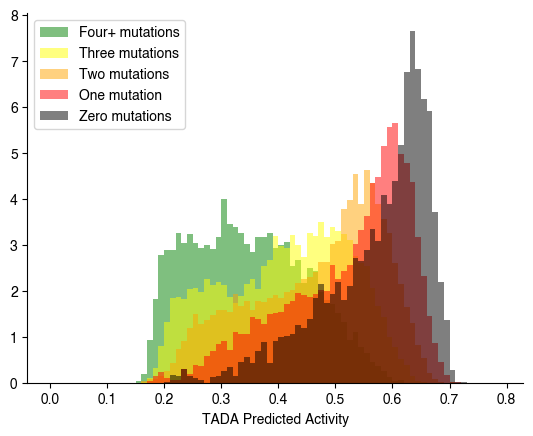

In [50]:
plt.hist(tile_predictions_more_than_4, alpha=0.5, density=True, label="Four+ mutations", bins=np.arange(0,0.8, 0.01), color=color_dict[4])
plt.hist(tile_predictions_3["tada_preds"], alpha=0.5, density=True, label="Three mutations", bins=np.arange(0,0.8, 0.01), color=color_dict[3])
plt.hist(tile_predictions_2["tada_preds"], alpha=0.5, density=True, label="Two mutations", bins=np.arange(0,0.8, 0.01), color=color_dict[2])
plt.hist(tile_predictions_1["tada_preds"], alpha=0.5, density=True, label="One mutation", bins=np.arange(0,0.8, 0.01), color=color_dict[1])
plt.hist(tile_predictions_0["tada_preds"], alpha=0.5, density=True, label="Zero mutations", bins=np.arange(0,0.8, 0.01), color=color_dict[0])

plt.legend()
plt.xlabel("TADA Predicted Activity")
plt.savefig("TADA_predicted_mutation_activity.pdf", format='pdf', bbox_inches='tight')

In [51]:
# Look at change in predicted activity

In [52]:
tile_predictions_0["names"] = seq_names
tile_predictions_1["names"] = name_dict[1]
tile_predictions_2["names"] = name_dict[2]
tile_predictions_3["names"] = name_dict[3]
tile_predictions_4["names"] = name_dict[4]
tile_predictions_5["names"] = name_dict[5]
tile_predictions_6["names"] = name_dict[6]
tile_predictions_7["names"] = name_dict[7]
tile_predictions_8["names"] = name_dict[8]

In [53]:
merged_data = tile_predictions_1.merge(tile_predictions_0, on="names", how="inner")
merged_data["activity_difference"] = merged_data["tada_preds_x"] - merged_data["tada_preds_y"]
merged_data

,name_x,sequence_x,tada_centers_x,tada_preds_x,names,name_y,sequence_y,tada_centers_y,tada_preds_y,activity_difference
0,Scas_Scas663.23,SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEAE,[20.0],0.648038,Scas_Scas663.23,Scas_Scas663.23,SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFE,[20.0],0.687987,-0.039948
1,Scas_Scas663.23,SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEAE,[20.0],0.648038,Scas_Scas663.23,Scas_Scas663.23,EEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFES,[20.0],0.687466,-0.039428
2,Scas_Scas663.23,SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEAE,[20.0],0.648038,Scas_Scas663.23,Scas_Scas663.23,EQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESL,[20.0],0.681779,-0.033740
3,Scas_Scas663.23,SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEAE,[20.0],0.648038,Scas_Scas663.23,Scas_Scas663.23,QEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESLD,[20.0],0.696144,-0.048106
4,Scas_Scas663.23,SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEAE,[20.0],0.648038,Scas_Scas663.23,Scas_Scas663.23,EDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESLDE,[20.0],0.697100,-0.049062
...,...,...,...,...,...,...,...,...,...,...
434205,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,FEDPDAETAPMAEPREDSSSWEPLFKEEDDLIQLATQSTS,[20.0],0.508975,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,IGSIFEDPDAETAPMFEPREDSSSWEPLFKEEDDLIQLAT,[20.0],0.581585,-0.072609
434206,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,FEDPDAETAPMAEPREDSSSWEPLFKEEDDLIQLATQSTS,[20.0],0.508975,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,GSIFEDPDAETAPMFEPREDSSSWEPLFKEEDDLIQLATQ,[20.0],0.583786,-0.074811
434207,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,FEDPDAETAPMAEPREDSSSWEPLFKEEDDLIQLATQSTS,[20.0],0.508975,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,SIFEDPDAETAPMFEPREDSSSWEPLFKEEDDLIQLATQS,[20.0],0.587264,-0.078289
434208,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,FEDPDAETAPMAEPREDSSSWEPLFKEEDDLIQLATQSTS,[20.0],0.508975,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,IFEDPDAETAPMFEPREDSSSWEPLFKEEDDLIQLATQST,[20.0],0.570068,-0.061093


In [54]:
merged_data = tile_predictions_2.merge(tile_predictions_0, on="names", how="inner")
merged_data["activity_difference"] = merged_data["tada_preds_x"] - merged_data["tada_preds_y"]
merged_data

,name_x,sequence_x,tada_centers_x,tada_preds_x,names,name_y,sequence_y,tada_centers_y,tada_preds_y,activity_difference
0,Scas_Scas663.23,SEEQEDDQAMTIPPLNELDSNVVDAFASSSTDSTPMFEFE,[20.0],0.589940,Scas_Scas663.23,Scas_Scas663.23,SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFE,[20.0],0.687987,-0.098047
1,Scas_Scas663.23,SEEQEDDQAMTIPPLNELDSNVVDAFASSSTDSTPMFEFE,[20.0],0.589940,Scas_Scas663.23,Scas_Scas663.23,EEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFES,[20.0],0.687466,-0.097526
2,Scas_Scas663.23,SEEQEDDQAMTIPPLNELDSNVVDAFASSSTDSTPMFEFE,[20.0],0.589940,Scas_Scas663.23,Scas_Scas663.23,EQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESL,[20.0],0.681779,-0.091839
3,Scas_Scas663.23,SEEQEDDQAMTIPPLNELDSNVVDAFASSSTDSTPMFEFE,[20.0],0.589940,Scas_Scas663.23,Scas_Scas663.23,QEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESLD,[20.0],0.696144,-0.106204
4,Scas_Scas663.23,SEEQEDDQAMTIPPLNELDSNVVDAFASSSTDSTPMFEFE,[20.0],0.589940,Scas_Scas663.23,Scas_Scas663.23,EDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESLDE,[20.0],0.697100,-0.107160
...,...,...,...,...,...,...,...,...,...,...
619875,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,AEDPDAETAPMAEPREDSSSWEPLFKEEDDLIQLATQSTS,[20.0],0.506244,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,IGSIFEDPDAETAPMFEPREDSSSWEPLFKEEDDLIQLAT,[20.0],0.581585,-0.075340
619876,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,AEDPDAETAPMAEPREDSSSWEPLFKEEDDLIQLATQSTS,[20.0],0.506244,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,GSIFEDPDAETAPMFEPREDSSSWEPLFKEEDDLIQLATQ,[20.0],0.583786,-0.077542
619877,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,AEDPDAETAPMAEPREDSSSWEPLFKEEDDLIQLATQSTS,[20.0],0.506244,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,SIFEDPDAETAPMFEPREDSSSWEPLFKEEDDLIQLATQS,[20.0],0.587264,-0.081020
619878,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,AEDPDAETAPMAEPREDSSSWEPLFKEEDDLIQLATQSTS,[20.0],0.506244,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,IFEDPDAETAPMFEPREDSSSWEPLFKEEDDLIQLATQST,[20.0],0.570068,-0.063824


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


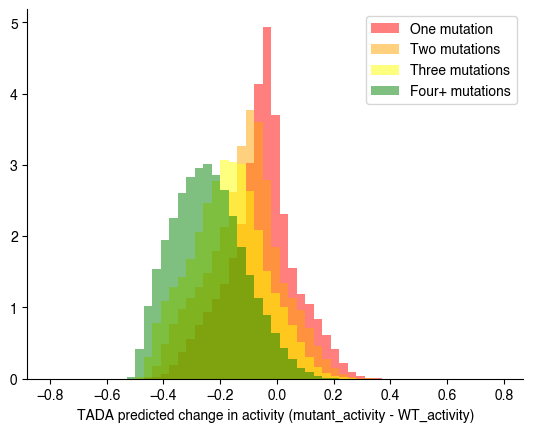

In [55]:
merged_data = tile_predictions_1.merge(tile_predictions_0, on="names", how="outer")
merged_data["activity_difference"] = merged_data["tada_preds_x"] - merged_data["tada_preds_y"]
plt.hist(merged_data["activity_difference"], label="One mutation", density=True, alpha=0.5, bins=np.arange(-0.8,0.8, 0.03), color=color_dict[1])

merged_data = tile_predictions_2.merge(tile_predictions_0, on="names", how="outer")
merged_data["activity_difference"] = merged_data["tada_preds_x"] - merged_data["tada_preds_y"]
plt.hist(merged_data["activity_difference"], label="Two mutations", density=True, alpha=0.5, bins=np.arange(-0.8,0.8, 0.03), color=color_dict[2])

merged_data = tile_predictions_3.merge(tile_predictions_0, on="names", how="outer")
merged_data["activity_difference"] = merged_data["tada_preds_x"] - merged_data["tada_preds_y"]
plt.hist(merged_data["activity_difference"], label="Three mutations", density=True, alpha=0.5, bins=np.arange(-0.8,0.8, 0.03), color=color_dict[3])

merged_data = pd.concat([tile_predictions_4, tile_predictions_5, tile_predictions_6, tile_predictions_7, tile_predictions_8]).merge(tile_predictions_0, on="names", how="outer")
merged_data["activity_difference"] = merged_data["tada_preds_x"] - merged_data["tada_preds_y"]
plt.hist(merged_data["activity_difference"], label="Four+ mutations", density=True, alpha=0.5, bins=np.arange(-0.8,0.8, 0.03), color=color_dict[4])


plt.xlabel("TADA predicted change in activity (mutant_activity - WT_activity)")
plt.legend()
plt.savefig("TADA_predicted_change_mutation_activity.pdf")

In [56]:
merged_data[merged_data["activity_difference"] > 0]

,name_x,sequence_x,tada_centers_x,tada_preds_x,names,name_y,sequence_y,tada_centers_y,tada_preds_y,activity_difference
3321,Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri,AAGSSSDSTPLAEAEGLGKTTDPKTWSSLFDDDIPVTLED,[20.0],0.528971,Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri,Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri,RSVPIFSESKRSTDLDSAVENFFGSSSDSTPLFEFEGLGK,[20.0],0.526435,0.002536
3322,Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri,AAGSSSDSTPLAEAEGLGKTTDPKTWSSLFDDDIPVTLED,[20.0],0.528971,Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri,Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri,SVPIFSESKRSTDLDSAVENFFGSSSDSTPLFEFEGLGKT,[20.0],0.519902,0.009068
3327,Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri,AAGSSSDSTPLAEAEGLGKTTDPKTWSSLFDDDIPVTLED,[20.0],0.528971,Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri,Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri,SESKRSTDLDSAVENFFGSSSDSTPLFEFEGLGKTTDPKT,[20.0],0.522010,0.006961
3328,Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri,AAGSSSDSTPLAEAEGLGKTTDPKTWSSLFDDDIPVTLED,[20.0],0.528971,Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri,Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri,ESKRSTDLDSAVENFFGSSSDSTPLFEFEGLGKTTDPKTW,[20.0],0.526207,0.002764
3329,Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri,AAGSSSDSTPLAEAEGLGKTTDPKTWSSLFDDDIPVTLED,[20.0],0.528971,Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri,Aace_AGO11762.1_SaccharomycetaceaeAshbyaAceri,SKRSTDLDSAVENFFGSSSDSTPLFEFEGLGKTTDPKTWS,[20.0],0.528186,0.000785
...,...,...,...,...,...,...,...,...,...,...
262638,Xylonomycetes_jgi|Xylhe1|264767|gm1.473_g,ADSPDVAESAETSPLAANADADLAGQDAWFSLAPSISGGE,[20.0],0.505312,Xylonomycetes_jgi|Xylhe1|264767|gm1.473_g,Xylonomycetes_jgi|Xylhe1|264767|gm1.473_g,ASAPPSAAFTNLTSPSIFDSPDVAESFETSPLFANADADL,[20.0],0.487050,0.018262
262641,Xylonomycetes_jgi|Xylhe1|264767|gm1.473_g,ADSPDVAESAETSPLAANADADLAGQDAWFSLAPSISGGE,[20.0],0.505312,Xylonomycetes_jgi|Xylhe1|264767|gm1.473_g,Xylonomycetes_jgi|Xylhe1|264767|gm1.473_g,PPSAAFTNLTSPSIFDSPDVAESFETSPLFANADADLAGQ,[20.0],0.493955,0.011357
262642,Xylonomycetes_jgi|Xylhe1|264767|gm1.473_g,ADSPDVAESAETSPLAANADADLAGQDAWFSLAPSISGGE,[20.0],0.505312,Xylonomycetes_jgi|Xylhe1|264767|gm1.473_g,Xylonomycetes_jgi|Xylhe1|264767|gm1.473_g,PSAAFTNLTSPSIFDSPDVAESFETSPLFANADADLAGQD,[20.0],0.495973,0.009339
262643,Xylonomycetes_jgi|Xylhe1|264767|gm1.473_g,ADSPDVAESAETSPLAANADADLAGQDAWFSLAPSISGGE,[20.0],0.505312,Xylonomycetes_jgi|Xylhe1|264767|gm1.473_g,Xylonomycetes_jgi|Xylhe1|264767|gm1.473_g,SAAFTNLTSPSIFDSPDVAESFETSPLFANADADLAGQDA,[20.0],0.481389,0.023923


# Analyze full sequences

In [57]:
seq_df["mutants"] = [create_mutants(seq, 'F', 'A')[1] for seq in seq_df["aa_seq"]]

mutants = {1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}}
for index in seq_df.index:
    mutant_list = seq_df.loc[index, "mutants"]
    seq_name = seq_df.loc[index, "name"]
    for i, mutant_set in enumerate(mutant_list):
        for j, mutant_seq in enumerate(mutant_set):
            mutants[i+1][f"{seq_name}_{j}"] = mutant_seq
            

In [58]:
mutants[2]

{'Eurotiomycetes_jgi|Penatra1|34162|e_gw1.2.1160.1_0': 'MFTDLDVAGHEDWPSLADHSSEPLNAADLATL',
 'Eurotiomycetes_jgi|Penatra1|34162|e_gw1.2.1160.1_1': 'MATDLDVAGHEDWPSLADHSSEPLNAFDLATL',
 'Eurotiomycetes_jgi|Penatra1|34162|e_gw1.2.1160.1_2': 'MATDLDVAGHEDWPSLFDHSSEPLNAADLATL',
 'Scas_Scas663.23_0': 'SEEQEDDQFMTIPPLNELDSNVVDAAFSSSTDSTPMFEAESLDESNDPKNWTSLFENDLPIITEDDVSLN',
 'Scas_Scas663.23_1': 'SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMAEFESLDESNDPKNWTSLAENDLPIITEDDVSLN',
 'Scas_Scas663.23_2': 'SEEQEDDQFMTIPPLNELDSNVVDAFASSSTDSTPMFEFESLDESNDPKNWTSLAENDLPIITEDDVSLN',
 'Scas_Scas663.23_3': 'SEEQEDDQAMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESLDESNDPKNWTSLAENDLPIITEDDVSLN',
 'Scas_Scas663.23_4': 'SEEQEDDQFMTIPPLNELDSNVVDAFASSSTDSTPMFEAESLDESNDPKNWTSLFENDLPIITEDDVSLN',
 'Scas_Scas663.23_5': 'SEEQEDDQAMTIPPLNELDSNVVDAFFSSSTDSTPMAEFESLDESNDPKNWTSLFENDLPIITEDDVSLN',
 'Scas_Scas663.23_6': 'SEEQEDDQAMTIPPLNELDSNVVDAFFSSSTDSTPMFEAESLDESNDPKNWTSLFENDLPIITEDDVSLN',
 'Scas_Scas663.23_7': 'SEEQEDDQFMTIPPLNELDSNVVDAFASSSTD

In [59]:
seq1_seq

NameError: name 'seq1_seq' is not defined

In [ ]:
seq2_seq

array(['DDHNADQALRSNPGLTISPFEIHSSVIGSIFEDPDAETAPMFEPREDSSSWEPLFKEEDDLIQLATQSTS'],
      dtype=object)

In [ ]:
# CHECKING MY WORK AGAIN
import re
n = 9
for seq1_name in mutants[n].keys():
    seq1_seq = mutants[n][seq1_name]
    seq2_seq = seq_df.loc[seq_df['name'] == re.sub(r'_\d+$', '', seq1_name), 'aa_seq']
    count = sum(1 for a, b in zip(seq1_seq, seq2_seq.values[0]) if a != b)
    if count != n: 
        print(count)

In [ ]:
for mutation_count in mutants.keys():
    outfile = f"top138_WxxLF_region_{mutation_count}_mutation.fasta"
    with open(outfile, "w+") as f:
        for seq_name in mutants[mutation_count].keys():
            f.write(f">{seq_name}\n")
            f.write(f"{mutants[mutation_count][seq_name]}\n")

In [60]:
def get_mutation_activity_df(count_int, count_str):
    mutation = pd.DataFrame.from_dict(mutants[count_int], orient='index')
    mutation.columns = ["sequence"]
    mutation["mutation_name"] = mutation.index
    mutation["seq_name"] = [re.sub(r'_\d+$', '', s) for s in mutation["mutation_name"]]
    mutation["mutation_count"] = count_int

    predictions = pd.read_csv(f"TADA_preds/top138_WxxLF_region_{count_int}_mutationTADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval})
    predictions = predictions.merge(mutation, on="sequence")

    return predictions

In [61]:
predictions_0 = pd.read_csv("TADA_preds/AllSeqs_IntegralAround_WxxLF_-50_+20_top138TADA_preds.csv", converters={'tada_centers':pd.eval, 'tada_preds':pd.eval}).merge(seq_df, left_on=["sequence", 'name'], right_on=["aa_seq", 'name'])
predictions_0["seq_name"] = predictions_0["name"]
predictions_0["mutation_name"] = predictions_0["name"]
predictions_0 = predictions_0.drop(["aa_seq", "name"], axis=1)
predictions_0["mutation_count"] = 0


In [62]:
predictions_1 = get_mutation_activity_df(1, "one")
predictions_2 = get_mutation_activity_df(2, "two")
predictions_3 = get_mutation_activity_df(3, "three")
predictions_4 = get_mutation_activity_df(4, "four")
predictions_5 = get_mutation_activity_df(5, "five")
predictions_6 = get_mutation_activity_df(6, "six")
predictions_7 = get_mutation_activity_df(7, "seven")
predictions_8 = get_mutation_activity_df(8, "eight")
predictions_9 = get_mutation_activity_df(9, "nine")

In [63]:
all_mutations = pd.concat([predictions_0, predictions_1, predictions_2, predictions_3, predictions_4, predictions_5, predictions_6, predictions_7, predictions_8, predictions_9])
all_mutations = all_mutations.reset_index()

In [64]:
color_dict = {
    0: "black",
    1: "red",
    2: "orange",
    3: "yellow",
    4: "green",
    5: "blue",
    6: "purple",
    7: "pink",
    8: "maroon", 
    9: "lightblue"
}

In [65]:
def smooth_data(position_list, activity_list, aa_seq):
    SmoothedActivitesLoess = defaultdict()
    maxActivity = max(activity_list)
    minActivity = min(activity_list)
    length = len(aa_seq)

    Y = np.array(activity_list)
    X = np.array(position_list) # center of tile

    # Actual smoothing part
    xout, yout, wout = loess.loess_1d.loess_1d(X, Y, xnew=range(length), degree=2, 
                                npoints=20, rotate=False, sigy=None)

    modyout = yout

    # This part makes sure that the ends are not negative
    # start = max(yout[20],0)
    # modyout[0:20] = start
    # end = max(yout[-20],0)
    # modyout[-20:] = end

    # This part makes sure that all values are between the min and maximum activites observed
    modyout2 = np.clip(modyout,a_min=minActivity,a_max=maxActivity)

    return modyout2

In [66]:
all_mutations.loc[index, "tada_centers"]

[20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0]

In [69]:
type(all_mutations.loc[index, "tada_preds"])

list

In [67]:
all_mutations.loc[index, "tada_preds"].astype('float')

AttributeError: 'list' object has no attribute 'astype'

In [ ]:
all_mutations.loc[index, "sequence"]

'SEEQEDDQFMTIPPLNELDSNVVDAAFSSSTDSTPMFEFESLDESNDPKNWTSLFENDLPIITEDDVSLN'

In [70]:
import loess
from loess import loess_1d

all_mutations["smoothed_data"] = [smooth_data(all_mutations.loc[index, "tada_centers"], all_mutations.loc[index, "tada_preds"], all_mutations.loc[index, "sequence"]) for index in all_mutations.index]

In [ ]:
# How to do hard part???

# We have alignment
# Calculate effect of mutating each F in the alignment --> Use smoothed data and single mutants
# Average the F effect across sequences

In [ ]:
# for seq in set(all_mutations["seq_name"]):
#     data = all_mutations[all_mutations["seq_name"] == seq]
#     for index in data.index:
#         plt.plot(data.loc[index, "tada_centers"], data.loc[index, "tada_preds"], color=color_dict[data.loc[index, "mutation_count"]], alpha=0.5)
#         # plt.plot(np.arange(len(data.loc[index, "sequence"])), data.loc[index, "smoothed_data"], color=color_dict[data.loc[index, "mutation_count"]], alpha=0.5)
        
#     plt.xlabel("Sequence Position")
#     plt.ylabel("Predicted activity")
#     plt.title(seq)
#     plt.savefig(f"TADA_seq_figs/{seq}.pdf", format='pdf', bbox_inches='tight')  
#     plt.show()  
    

In [ ]:
data[data['mutation_count'] == 0]["sequence"].values[0].find("W")

50

In [ ]:
len(data[data['mutation_count'] == 0]['sequence'].values[0])

70

In [ ]:
data.loc[98, "tada_centers"]

array([20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0,
       31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0,
       42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0], dtype=object)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp


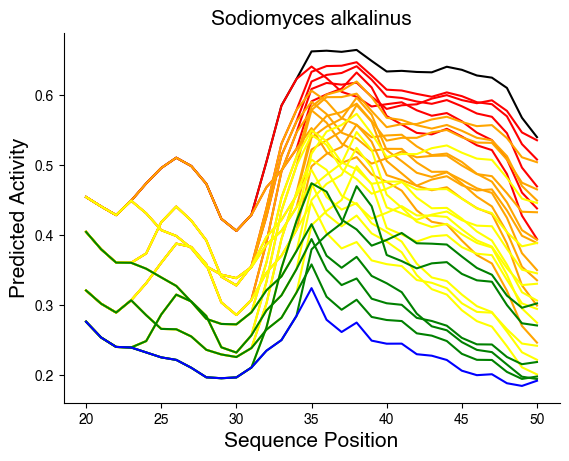

In [ ]:
seq = 'Sordariomycetes_jgi|Sodal1|301461|estExt_Genewise1.C_12_t10161'
data = all_mutations[all_mutations["seq_name"] == seq]
for index in data.index:
    plt.plot(data.loc[index, "tada_centers"], data.loc[index, "tada_preds"], color=color_dict[data.loc[index, "mutation_count"]])
    plt.title("Sodiomyces alkalinus", size=15)
    plt.xlabel("Sequence Position", size=15)
    plt.ylabel("Predicted Activity", size=15)

plt.savefig("sodiomyces_alkalinus_mutate_Fs_paper_fig.pdf", format='pdf', bbox_inches='tight')

# Hard part

In [71]:
from Bio import AlignIO
# Read in the alignment
# Assign each alignment to a sequence

# Assign each tile to an alignment F

alignment = AlignIO.read("../data/fasta_files/AllSeqs_IntegralAround_WxxLF_-50_+20_top138_mafft.fasta", "fasta")

In [72]:
alignment_file = "../data/fasta_files/AllSeqs_IntegralAround_WxxLF_-50_+20_top138_mafft.fasta"
with open(alignment_file, "r") as f:
    lines = f.readlines()

    names = []
    seqs = []
    seq = ""

    for line in lines:
        if line.startswith(">"):
            names.append(line.strip().replace(">",""))
            if len(seq) > 0:
                seqs.append(seq)
                seq = ""
        else:
            seq += line.strip()

    seqs.append(seq)

    amino_acids = ['C', 'N', 'Q', 'T', 'G', 'A', 'V', 'I', 'M','Y','H', 'S', 'P', 'D', 'E', 'K', 'R', 'F', 'W', 'L', '-']

    # Each sequence position gets an dictionary is the list
    amino_acid_dicts = [{aa: 0 for aa in amino_acids}.copy() for _ in range(len(seqs[0]))]

    for seq in seqs: 
        for i, aa in enumerate(seq): 
            amino_acid_dicts[i][aa] += 1

    # Calculate F conservation
    F_conservation = []
    for i, count_dict in enumerate(amino_acid_dicts):
        F_conservation.append(count_dict['F'] / len(seqs))

In [73]:
# For each sequence:
#   For each F:
#       Calculate change in activity for mutating F
#       Get conservation value

F_conservation_dict = {}

# Merge the 0 and 1 predictions (so both in same row)
testing = predictions_0.merge(predictions_1, on="seq_name", how='outer')

for index in testing.index:     
    # Get the F indicies for given sequence
    locations_F =  [i for i, c in enumerate(testing.loc[index, "sequence_x"]) if c == "F"]

    # Get which F is actually mutated to A
    for i, location in enumerate(locations_F):
        if testing.loc[index, "sequence_y"][location] == 'A':
            mutant_F_num = i

    # Get index of mutant F
    mutant_F_index = locations_F[mutant_F_num]

    # Confirm this position is mutated
    # print(testing.loc[index, "sequence_y"][mutant_F_index], testing.loc[index, "sequence_x"][mutant_F_index]) 

    # Get all tiles that overlap with the given position
    tile_centers = np.array([i for i in range(mutant_F_index-19, mutant_F_index+20)])

    # Filter out tiles that are shorter than 40aa
    tile_centers = [tile for tile in tile_centers if (tile >= min(testing.loc[index, "tada_centers_y"]) and tile <= max(testing.loc[index, "tada_centers_y"]))]

    if len(tile_centers) > 0:
        # Get indicies of tiles within the list
        min_tile = list(testing.loc[index, "tada_centers_y"]).index(tile_centers[0])
        max_tile = list(testing.loc[index, "tada_centers_y"]).index(tile_centers[-1])

        # Get corresponding tile predictons
        mutant_preds = testing.loc[index, "tada_preds_y"][min_tile:max_tile+1]
        orig_preds = testing.loc[index, "tada_preds_x"][min_tile:max_tile+1]

        # Calculate the change in activity between the two activities
        change_in_activity = np.array(mutant_preds) - np.array(orig_preds)

        # Get conservation value for this F
        for record in alignment: 
            if testing.loc[index, "seq_name"] == record.name:
                alignment_seq = str(record.seq)
                # Indicies of the F within the alignment
                locations_F_align = [i for i, c in enumerate(alignment_seq) if c == "F"]

        # Index of the F of interest within the alignment
        index_F_align = locations_F_align[mutant_F_num]

        # Calculated earlier: The conservation value of the given F
        F_consevation_val = F_conservation[index_F_align]

        # Save this info in a dictionary
        if F_consevation_val in F_conservation_dict:
            F_conservation_dict[F_consevation_val] = F_conservation_dict[F_consevation_val] + list(change_in_activity)
        else:
            F_conservation_dict[F_consevation_val] = list(change_in_activity)


In [ ]:
def count_mismatch(seq1, seq2):
    mismatch = 0
    for c1, c2 in zip(seq1, seq2):
        if c1 != c2:
            mismatch +=1
    return mismatch

In [ ]:
testing["mismatch"] = [count_mismatch(s1, s2) for s1, s2 in zip(testing["sequence_x"], testing["sequence_y"])]
testing["mismatch"].value_counts()

mismatch
1    699
Name: count, dtype: int64

In [ ]:
x = [key for key, values in F_conservation_dict.items() for value in values]
y = [value for key, values in F_conservation_dict.items() for value in values]


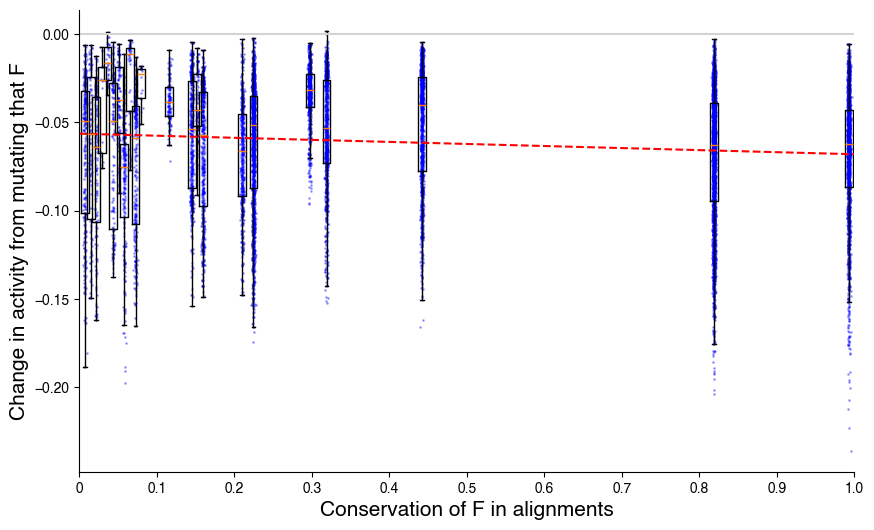

In [ ]:
# Sort data by keys (x-axis positions)
sorted_data = dict(sorted(F_conservation_dict.items(), key=lambda item: item[0]))
values = list(sorted_data.values())
keys = list(sorted_data.keys())  # These are the float positions

# Create box plot with custom positions
plt.figure(figsize=(10, 6))
plt.boxplot(values, positions=keys, vert=True, widths=0.01, showfliers=False)  # Adjust width as needed

# # Overlay scatter plot for all points
# for i, (group, key) in enumerate(zip(values, keys), start=1):
#     x = np.random.normal(key, 0.001, size=len(group))  # Add jitter for better visualization
#     plt.scatter(x, group, alpha=0.3, color="blue", s=1)

plt.xlabel("Conservation of F in alignments", size=15)
plt.ylabel("Change in activity from mutating that F", size=15)
# plt.xticks(keys, labels=[f"{key:.3f}" for key in keys], rotation=45)  # Format labels for readability
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], labels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlim(0,1)

x = [np.random.normal(key, 0.001) for key, values in F_conservation_dict.items() for value in values]
y = [value for key, values in F_conservation_dict.items() for value in values]
plt.scatter(x,y, alpha=0.3, s=1, color="blue")
m, b = np.polyfit(x, y, 1) 
plt.plot(np.arange(0,1.1,0.1), m*np.arange(0,1.1,0.1) + b, color='red', linestyle='dashed')
plt.hlines(0, 0, 1, color='lightgrey')
plt.savefig("TADA_change_activity_proportional_boxplot.pdf", format='pdf', bbox_inches='tight')

{'whiskers': [<matplotlib.lines.Line2D at 0x169c944f0>,
 'caps': [<matplotlib.lines.Line2D at 0x3179d1030>,
 'boxes': [<matplotlib.lines.Line2D at 0x169e6e350>,
 'medians': [<matplotlib.lines.Line2D at 0x3179d01f0>,
 'fliers': [],
 'means': []}

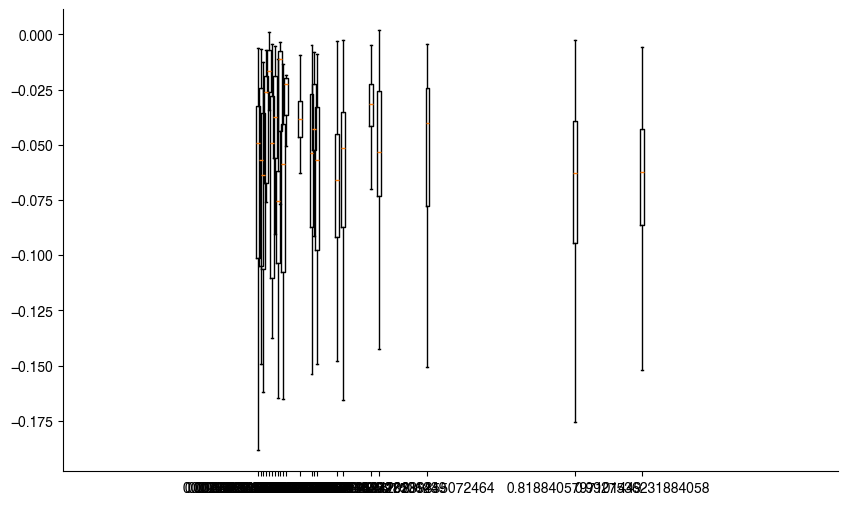

In [ ]:
# Sort data by keys (x-axis positions)
sorted_data = dict(sorted(F_conservation_dict.items(), key=lambda item: item[0]))
values = list(sorted_data.values())
keys = list(sorted_data.keys())  # These are the float positions

# Create box plot with custom positions
plt.figure(figsize=(10, 6))
plt.boxplot(values, positions=keys, vert=True, widths=0.01, showfliers=False)  # Adjust width as needed

# # Overlay scatter plot for all points
# for i, (group, key) in enumerate(zip(values, keys), start=1):
#     x = np.random.normal(key, 0.001, size=len(group))  # Add jitter for better visualization
#     plt.scatter(x, group, alpha=0.3, color="blue", s=1)

# plt.xlabel("Conservation of F in alignments", size=15)
# plt.ylabel("Change in activity from mutating that F", size=15)
# # plt.xticks(keys, labels=[f"{key:.3f}" for key in keys], rotation=45)  # Format labels for readability
# plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], labels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
# plt.xlim(0,1)

# x = [np.random.normal(key, 0.001) for key, values in F_conservation_dict.items() for value in values]
# y = [value for key, values in F_conservation_dict.items() for value in values]
# plt.scatter(x,y, alpha=0.3, s=1, color="blue")
# m, b = np.polyfit(x, y, 1) 
# plt.plot(np.arange(0,1.1,0.1), m*np.arange(0,1.1,0.1) + b, color='red', linestyle='dashed')
# plt.hlines(0, 0, 1, color='lightgrey')
# plt.savefig("TADA_change_activity_proportional_boxplot.pdf", format='pdf', bbox_inches='tight')

Text(0, 0.5, 'Change in activity from mutating that F')

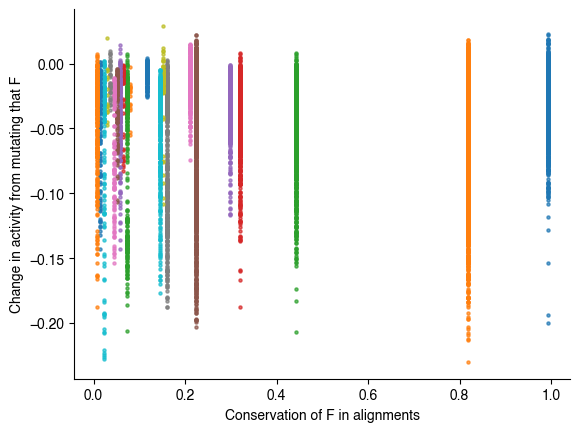

In [ ]:
# values = list(F_conservation_dict.values())
keys = [key for key in F_conservation_dict.keys()] 
for key in keys:
    values = F_conservation_dict[key]
    plt.scatter([key] * len(values), values, alpha=0.7, s=5)

plt.xlabel("Conservation of F in alignments")
plt.ylabel("Change in activity from mutating that F")


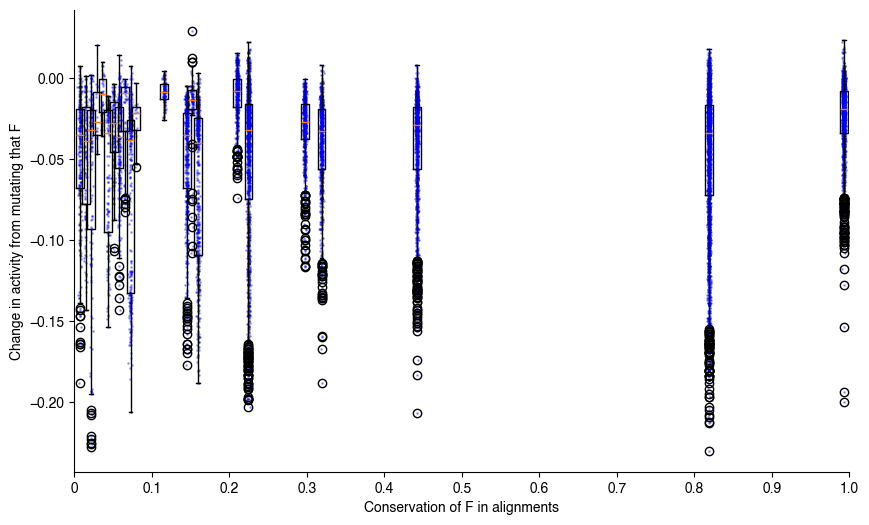

<Figure size 640x480 with 0 Axes>

In [ ]:
# Sort data by keys (x-axis positions)
sorted_data = dict(sorted(F_conservation_dict.items(), key=lambda item: item[0]))
values = list(sorted_data.values())
keys = list(sorted_data.keys())  # These are the float positions

# Create box plot with custom positions
plt.figure(figsize=(10, 6))
plt.boxplot(values, positions=keys, vert=True, widths=0.01)  # Adjust width as needed

# Overlay scatter plot for all points
for i, (group, key) in enumerate(zip(values, keys), start=1):
    x = np.random.normal(key, 0.001, size=len(group))  # Add jitter for better visualization
    plt.scatter(x, group, alpha=0.3, color="blue", s=1)

plt.xlabel("Conservation of F in alignments")
plt.ylabel("Change in activity from mutating that F")
# plt.xticks(keys, labels=[f"{key:.3f}" for key in keys], rotation=45)  # Format labels for readability
plt.xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], labels=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.xlim(0,1)
plt.show()

plt.savefig("TADA_change_activity_proportional_boxplot.pdf")

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


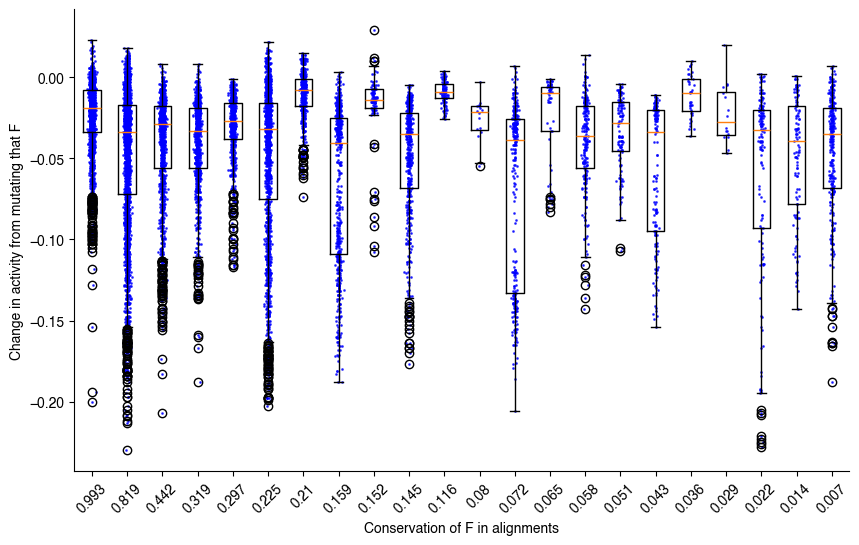

In [ ]:
F_conservation_dict = dict(sorted(F_conservation_dict.items(), key=lambda item: item[0], reverse=True))

values = list(F_conservation_dict.values())
keys = [str(round(key, 3)) for key in F_conservation_dict.keys()]

# Create box plot
plt.figure(figsize=(10, 6))
plt.boxplot(values, labels=keys, vert=True)


# Overlay scatter plot for all points
for i, group in enumerate(values, start=1):
    x = np.random.normal(i, 0.04, size=len(group))  # Add jitter for better visualization
    plt.scatter(x, group, alpha=0.7, color="blue", s=1, label="All Points" if i == 1 else None)


plt.xticks(rotation=45)
plt.xlabel("Conservation of F in alignments")
plt.ylabel("Change in activity from mutating that F")

plt.savefig("TADA_change_activity_uniform_boxplot.pdf")

In [ ]:
alignments = []
for record in alignment:
    alignments.append(str(record.seq))

seq_df["alignment"] = alignments
seq_df

,name,aa_seq,tiles,mutants,alignment
0,Eurotiomycetes_jgi|Penatra1|34162|e_gw1.2.1160.1,MFTDLDVAGHEDWPSLFDHSSEPLNAFDLATL,[],"[{MFTDLDVAGHEDWPSLFDHSSEPLNAADLATL, MFTDLDVAGH...",----------------------------------------------...
1,Scas_Scas663.23,SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESLDESN...,"[SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFE, EEQ...",[{SEEQEDDQAMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESLDE...,----------------SEEQEDDQF--M--------TIPPLNELDS...
2,Cten_EGV62856.1_CandidaTenuisATCC10573,ESAPGLSAPDSSLAFHSEVLDSVFSNDEAVDHTPMFDELDFMLESS...,"[ESAPGLSAPDSSLAFHSEVLDSVFSNDEAVDHTPMFDELD, SAP...",[{ESAPGLSAPDSSLAAHSEVLDSVFSNDEAVDHTPMFDELDFMLE...,ESAPG--------------LSAPDS--S-------------LAFHS...
3,Eurotiomycetes_jgi|Asptam1|203219|CE203218_32345,PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMFATDMELGP...,"[PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMFAT, KDL...",[{PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMAATDMEL...,-----------PKDLFMD-ASAPPS--A-----------SFTDLST...
4,Eurotiomycetes_jgi|Penbr2|60600|gm1.7763_g,ISPRDLMMDTSVPPSGTFTDLSTPSFESPGNFSQNASPMFTDMDLV...,"[ISPRDLMMDTSVPPSGTFTDLSTPSFESPGNFSQNASPMF, SPR...",[{ISPRDLMMDTSVPPSGTATDLSTPSFESPGNFSQNASPMFTDMD...,---------ISPRDLMMD-TSVPPS--G-----------TFTDLST...
...,...,...,...,...,...
133,Sordariomycetes_jgi|Hypfra2|223471|CE223470_11...,QDHFTSAPNSSAITNLTSPSMYGESPDLHDSYEVSPNYGGSDFDHG...,"[QDHFTSAPNSSAITNLTSPSMYGESPDLHDSYEVSPNYGG, DHF...",[{QDHFTSAPNSSAITNLTSPSMYGESPDLHDSYEVSPNYGGSDAD...,------------QDHFT---SAPNS--S-----------AITNLTS...
134,Blastocladiomycota_jgi|Catan2|1506241|gm1.11555_g,TSTSAPPSPVPSLELCAATSGRALSKSPSPFDFGAAPPADATLVVS...,"[TSTSAPPSPVPSLELCAATSGRALSKSPSPFDFGAAPPAD, STS...",[{TSTSAPPSPVPSLELCAATSGRALSKSPSPADFGAAPPADATLV...,TS-----------------TSAPPS------------PVPSLELCA...
135,Saccharomycotina_jgi|Ascru1|80718|fgenesh1_pm....,NSNRRNNAISHDDVVAPKQTISREELLLITDQVFSNDNVSIFDEKL...,"[NSNRRNNAISHDDVVAPKQTISREELLLITDQVFSNDNVS, SNR...",[{NSNRRNNAISHDDVVAPKQTISREELLLITDQVFSNDNVSIADE...,NS-NRRNNAISHDD-----VVAPKQ--T----------ISREELLL...
136,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,DDHNADQALRSNPGLTISPFEIHSSVIGSIFEDPDAETAPMFEPRE...,"[DDHNADQALRSNPGLTISPFEIHSSVIGSIFEDPDAETAP, DHN...",[{DDHNADQALRSNPGLTISPAEIHSSVIGSIFEDPDAETAPMFEP...,--------DDHNADQAL--RSNPGL--T----------ISPFEIHS...


In [ ]:
# Smoothed data and then plot smoothed value vs conservation
# Tile containing mutation vs. conservation


<BarContainer object of 158 artists>

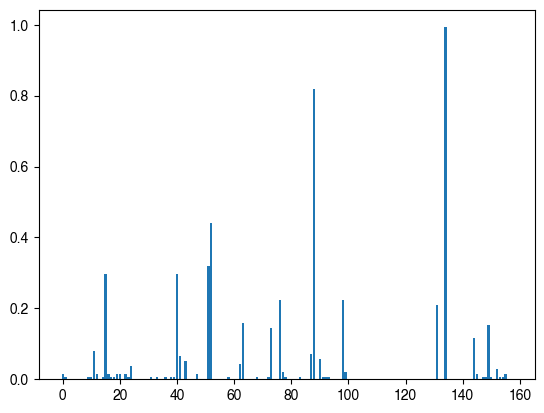

In [ ]:
plt.bar(range(len(F_conservation)), F_conservation)

In [ ]:
pd.concat([predictions_0, predictions_1]).merge(seq_df, left_on="seq_name", right_on="name")

,sequence,adhunter_centers,adhunter_preds,tiles_x,seq_name,mutation_name,mutation_count,name,aa_seq,tiles_y,mutants,alignment
0,SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESLDESN...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[171118.203125, 166408.765625, 188657.890625, ...","[SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFE, EEQ...",Scas_Scas663.23,Scas_Scas663.23,0,Scas_Scas663.23,SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESLDESN...,"[SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFE, EEQ...",[{SEEQEDDQAMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESLDE...,----------------SEEQEDDQF--M--------TIPPLNELDS...
1,ESAPGLSAPDSSLAFHSEVLDSVFSNDEAVDHTPMFDELDFMLESS...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[67904.984375, 184373.59375, 202979.640625, 26...","[ESAPGLSAPDSSLAFHSEVLDSVFSNDEAVDHTPMFDELD, SAP...",Cten_EGV62856.1_CandidaTenuisATCC10573,Cten_EGV62856.1_CandidaTenuisATCC10573,0,Cten_EGV62856.1_CandidaTenuisATCC10573,ESAPGLSAPDSSLAFHSEVLDSVFSNDEAVDHTPMFDELDFMLESS...,"[ESAPGLSAPDSSLAFHSEVLDSVFSNDEAVDHTPMFDELD, SAP...",[{ESAPGLSAPDSSLAAHSEVLDSVFSNDEAVDHTPMFDELDFMLE...,ESAPG--------------LSAPDS--S-------------LAFHS...
2,PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMFATDMELGP...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[129789.4140625, 105003.03125, 124637.96875, 9...","[PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMFAT, KDL...",Eurotiomycetes_jgi|Asptam1|203219|CE203218_32345,Eurotiomycetes_jgi|Asptam1|203219|CE203218_32345,0,Eurotiomycetes_jgi|Asptam1|203219|CE203218_32345,PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMFATDMELGP...,"[PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMFAT, KDL...",[{PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMAATDMEL...,-----------PKDLFMD-ASAPPS--A-----------SFTDLST...
3,ISPRDLMMDTSVPPSGTFTDLSTPSFESPGNFSQNASPMFTDMDLV...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[97933.84375, 70786.5, 58972.66796875, 64928.6...","[ISPRDLMMDTSVPPSGTFTDLSTPSFESPGNFSQNASPMF, SPR...",Eurotiomycetes_jgi|Penbr2|60600|gm1.7763_g,Eurotiomycetes_jgi|Penbr2|60600|gm1.7763_g,0,Eurotiomycetes_jgi|Penbr2|60600|gm1.7763_g,ISPRDLMMDTSVPPSGTFTDLSTPSFESPGNFSQNASPMFTDMDLV...,"[ISPRDLMMDTSVPPSGTFTDLSTPSFESPGNFSQNASPMF, SPR...",[{ISPRDLMMDTSVPPSGTATDLSTPSFESPGNFSQNASPMFTDMD...,---------ISPRDLMMD-TSVPPS--G-----------TFTDLST...
4,PKDLFMDASAPPSTSFTDLSTPSFESPGYFSQDTSPMFPTDLELNP...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[91281.9921875, 70201.265625, 91076.7578125, 7...","[PKDLFMDASAPPSTSFTDLSTPSFESPGYFSQDTSPMFPT, KDL...",Eurotiomycetes_jgi|Asprhi1|175121|MIX3149_2662...,Eurotiomycetes_jgi|Asprhi1|175121|MIX3149_2662...,0,Eurotiomycetes_jgi|Asprhi1|175121|MIX3149_2662...,PKDLFMDASAPPSTSFTDLSTPSFESPGYFSQDTSPMFPTDLELNP...,"[PKDLFMDASAPPSTSFTDLSTPSFESPGYFSQDTSPMFPT, KDL...",[{PKDLFMDASAPPSTSFTDLSTPSFESPGYFSQDTSPMFPTDLEL...,-----------PKDLFMD-ASAPPS--T-----------SFTDLST...
...,...,...,...,...,...,...,...,...,...,...,...,...
826,NSNRRNNAISHDDVVAPKQTISREELLLITDQVASNDNVSIFDEKL...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[41166.32421875, 47301.1171875, 81909.625, 712...",NaN,Saccharomycotina_jgi|Ascru1|80718|fgenesh1_pm....,Saccharomycotina_jgi|Ascru1|80718|fgenesh1_pm....,1,Saccharomycotina_jgi|Ascru1|80718|fgenesh1_pm....,NSNRRNNAISHDDVVAPKQTISREELLLITDQVFSNDNVSIFDEKL...,"[NSNRRNNAISHDDVVAPKQTISREELLLITDQVFSNDNVS, SNR...",[{NSNRRNNAISHDDVVAPKQTISREELLLITDQVFSNDNVSIADE...,NS-NRRNNAISHDD-----VVAPKQ--T----------ISREELLL...
827,DDHNADQALRSNPGLTISPFEIHSSVIGSIFEDPDAETAPMFEPRE...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[50687.3828125, 56346.33984375, 92441.515625, ...",NaN,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g_2,1,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,DDHNADQALRSNPGLTISPFEIHSSVIGSIFEDPDAETAPMFEPRE...,"[DDHNADQALRSNPGLTISPFEIHSSVIGSIFEDPDAETAP, DHN...",[{DDHNADQALRSNPGLTISPAEIHSSVIGSIFEDPDAETAPMFEP...,--------DDHNADQAL--RSNPGL--T----------ISPFEIHS...
828,DDHNADQALRSNPGLTISPAEIHSSVIGSIFEDPDAETAPMFEPRE...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[41108.2578125, 45435.97265625, 82605.78125, 

,sequence,adhunter_centers,adhunter_preds,tiles_x,seq_name,mutation_name,mutation_count,name,aa_seq,tiles_y,mutants,alignment
0,SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESLDESN...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[171118.203125, 166408.765625, 188657.890625, ...","[SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFE, EEQ...",Scas_Scas663.23,Scas_Scas663.23,0,Scas_Scas663.23,SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESLDESN...,"[SEEQEDDQFMTIPPLNELDSNVVDAFFSSSTDSTPMFEFE, EEQ...",[{SEEQEDDQAMTIPPLNELDSNVVDAFFSSSTDSTPMFEFESLDE...,----------------SEEQEDDQF--M--------TIPPLNELDS...
1,ESAPGLSAPDSSLAFHSEVLDSVFSNDEAVDHTPMFDELDFMLESS...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[67904.984375, 184373.59375, 202979.640625, 26...","[ESAPGLSAPDSSLAFHSEVLDSVFSNDEAVDHTPMFDELD, SAP...",Cten_EGV62856.1_CandidaTenuisATCC10573,Cten_EGV62856.1_CandidaTenuisATCC10573,0,Cten_EGV62856.1_CandidaTenuisATCC10573,ESAPGLSAPDSSLAFHSEVLDSVFSNDEAVDHTPMFDELDFMLESS...,"[ESAPGLSAPDSSLAFHSEVLDSVFSNDEAVDHTPMFDELD, SAP...",[{ESAPGLSAPDSSLAAHSEVLDSVFSNDEAVDHTPMFDELDFMLE...,ESAPG--------------LSAPDS--S-------------LAFHS...
2,PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMFATDMELGP...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[129789.4140625, 105003.03125, 124637.96875, 9...","[PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMFAT, KDL...",Eurotiomycetes_jgi|Asptam1|203219|CE203218_32345,Eurotiomycetes_jgi|Asptam1|203219|CE203218_32345,0,Eurotiomycetes_jgi|Asptam1|203219|CE203218_32345,PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMFATDMELGP...,"[PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMFAT, KDL...",[{PKDLFMDASAPPSASFTDLSTPSFESPGYFSQDTSPMAATDMEL...,-----------PKDLFMD-ASAPPS--A-----------SFTDLST...
3,ISPRDLMMDTSVPPSGTFTDLSTPSFESPGNFSQNASPMFTDMDLV...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[97933.84375, 70786.5, 58972.66796875, 64928.6...","[ISPRDLMMDTSVPPSGTFTDLSTPSFESPGNFSQNASPMF, SPR...",Eurotiomycetes_jgi|Penbr2|60600|gm1.7763_g,Eurotiomycetes_jgi|Penbr2|60600|gm1.7763_g,0,Eurotiomycetes_jgi|Penbr2|60600|gm1.7763_g,ISPRDLMMDTSVPPSGTFTDLSTPSFESPGNFSQNASPMFTDMDLV...,"[ISPRDLMMDTSVPPSGTFTDLSTPSFESPGNFSQNASPMF, SPR...",[{ISPRDLMMDTSVPPSGTATDLSTPSFESPGNFSQNASPMFTDMD...,---------ISPRDLMMD-TSVPPS--G-----------TFTDLST...
4,PKDLFMDASAPPSTSFTDLSTPSFESPGYFSQDTSPMFPTDLELNP...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[91281.9921875, 70201.265625, 91076.7578125, 7...","[PKDLFMDASAPPSTSFTDLSTPSFESPGYFSQDTSPMFPT, KDL...",Eurotiomycetes_jgi|Asprhi1|175121|MIX3149_2662...,Eurotiomycetes_jgi|Asprhi1|175121|MIX3149_2662...,0,Eurotiomycetes_jgi|Asprhi1|175121|MIX3149_2662...,PKDLFMDASAPPSTSFTDLSTPSFESPGYFSQDTSPMFPTDLELNP...,"[PKDLFMDASAPPSTSFTDLSTPSFESPGYFSQDTSPMFPT, KDL...",[{PKDLFMDASAPPSTSFTDLSTPSFESPGYFSQDTSPMFPTDLEL...,-----------PKDLFMD-ASAPPS--T-----------SFTDLST...
...,...,...,...,...,...,...,...,...,...,...,...,...
826,NSNRRNNAISHDDVVAPKQTISREELLLITDQVASNDNVSIFDEKL...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[41166.32421875, 47301.1171875, 81909.625, 712...",NaN,Saccharomycotina_jgi|Ascru1|80718|fgenesh1_pm....,Saccharomycotina_jgi|Ascru1|80718|fgenesh1_pm....,1,Saccharomycotina_jgi|Ascru1|80718|fgenesh1_pm....,NSNRRNNAISHDDVVAPKQTISREELLLITDQVFSNDNVSIFDEKL...,"[NSNRRNNAISHDDVVAPKQTISREELLLITDQVFSNDNVS, SNR...",[{NSNRRNNAISHDDVVAPKQTISREELLLITDQVFSNDNVSIADE...,NS-NRRNNAISHDD-----VVAPKQ--T----------ISREELLL...
827,DDHNADQALRSNPGLTISPFEIHSSVIGSIFEDPDAETAPMFEPRE...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[50687.3828125, 56346.33984375, 92441.515625, ...",NaN,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g_2,1,Saccharomycotina_jgi|Hanpo2|10524|gm1.4782_g,DDHNADQALRSNPGLTISPFEIHSSVIGSIFEDPDAETAPMFEPRE...,"[DDHNADQALRSNPGLTISPFEIHSSVIGSIFEDPDAETAP, DHN...",[{DDHNADQALRSNPGLTISPAEIHSSVIGSIFEDPDAETAPMFEP...,--------DDHNADQAL--RSNPGL--T----------ISPFEIHS...
828,DDHNADQALRSNPGLTISPAEIHSSVIGSIFEDPDAETAPMFEPRE...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[41108.2578125, 45435.97265625, 82605.78125, 

In [ ]:
single_mutant_data = predictions_1.merge(seq_df, left_on="seq_name", right_on="name")
single_mutant_data["smoothed_activity"] = [smooth_data(single_mutant_data.loc[index, "adhunter_centers"], single_mutant_data.loc[index, "adhunter_preds"], single_mutant_data.loc[index, "sequence"]) for index in single_mutant_data.index]


In [ ]:
for record in alignment:
    print(record.seq)

---------------------------------------------------------------------------------------MFTDL----D-VA--------------------------GHEDWPSLFDHS---S-EPL-NAFD-LATL--
----------------SEEQEDDQF--M--------TIPPLNELDSNVVDAFF----------------S---SS-TDSTP------MFEFE----S-LD-------------------ESN----DPKNWTSLFENDL----PII-TEDDVSLN---
ESAPG--------------LSAPDS--S-------------LAFHSEVLDSVFS--------------ND---EA-VDHTP------MFDEL----D-FML---------------ES---S----NKEDWVSLFDAN---N-EID-NSFN-FTKV--
-----------PKDLFMD-ASAPPS--A-----------SFTDLSTP---SF-------ESPGY---------FS-QDTSP------MFATDM---E-LG---------------------P----GVEEWGSLFPSQ---D-DFS-LGLD-TTAL--
---------ISPRDLMMD-TSVPPS--G-----------TFTDLSTP---SF-------ESPGN---------FS-QNASP------MFTDM----D-LV--------------------------GHEEWPSLFDGA---S-DM--NAFD-LANLD-
-----------PKDLFMD-ASAPPS--T-----------SFTDLSTP---SF-------ESPGY---------FS-QDTSP------MFPTDL---E-LN---------------------P----GHEEWDSLFPPQ---D-GFP-VAFD-SAAL--
---------ISPKDLMMD-ASVPPS--G-----------TFTDLST

# Controls